In [70]:
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

%matplotlib inline

In [71]:
df=pd.read_csv('dataset/svr/concrete_data.csv')

In [72]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [73]:
df.shape

(1030, 9)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [75]:
# Index features in DataFrame
col_names = df.columns
col_names

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [76]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                    Total Null Values  Percentage
Cement                              0         0.0
Blast Furnace Slag                  0         0.0
Fly Ash                             0         0.0
Water                               0         0.0
Superplasticizer                    0         0.0
Coarse Aggregate                    0         0.0
Fine Aggregate                      0         0.0
Age                                 0         0.0
Strength                            0         0.0


In [77]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [78]:
# Summary statistics dataset in numerical variables
round(df.describe(), 2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


<Axes: >

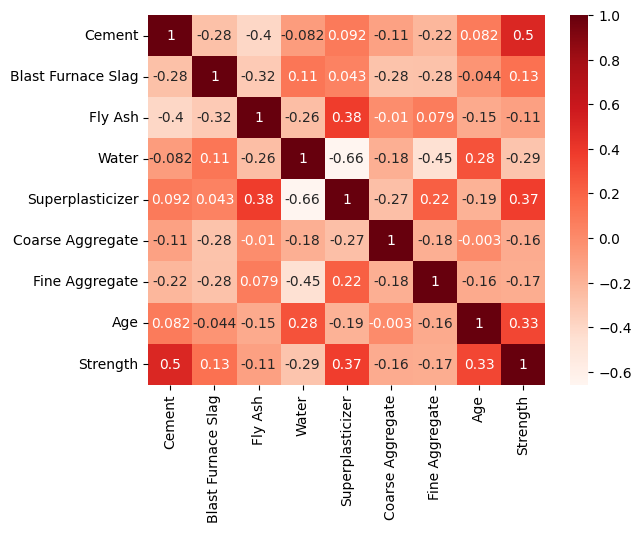

In [79]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

In [101]:
# """ I'm use two regresional variables, X will be Cement, and Y will be Strength. Because the corelation between
#     base_price and emailed_for_promotion is the biggest correlation, 0.5. Cement is basic ingredients for building
#     Infrastructure
# """

# Input and Output features
# Input
X = df[['Cement', 'Strength']]

# Output 
y = df['Strength']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(721, 2) (309, 2) (721,) (309,)


In [103]:
# Support Vector Regression

from sklearn.svm import SVR

Strength_svr = SVR().fit(X_train, y_train)

In [104]:
print('The R_sq is %.5f'% Strength_svr.score(X_train, y_train))

The R_sq is 0.61503


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [107]:
# Predicting on the training data
ytrain_pred = Strength_svr.predict(X_train)

In [110]:
print('The R_sq is %.5f'% r2_score(y_train, ytrain_pred))

The R_sq is 0.61503


In [137]:
# MAE Score, MSE, and RMSE, EVS
print('The MAE is %.5f'% mean_absolute_error(y_train, ytrain_pred))
print('The MSE is %.5f'% mean_squared_error(y_train, ytrain_pred))
print('The RMSE is %.5f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('The EVS is %.5f'% explained_variance_score(y_train, ytrain_pred))


The MAE is 8.59211
The MSE is 110.00657
The RMSE is 10.48840
The EVS is 0.61696


In [119]:
# Prediction on the testing dataset
ytest_pred = Strength_svr.predict(X_test)
print(ytest_pred[:10])

[30.95996706 26.95647278 28.78538834 23.24185458 30.19541731 44.89435842
 33.62727957 43.74512081 41.52962253 26.43590597]


In [121]:
# The coef of determination
print('The R_sq is %.5f'% r2_score(y_test, ytest_pred))

print('The R_sq is %.5f'% Strength_svr.score(X_test, y_test))


The R_sq is 0.60285
The R_sq is 0.60285


<function matplotlib.pyplot.show(close=None, block=None)>

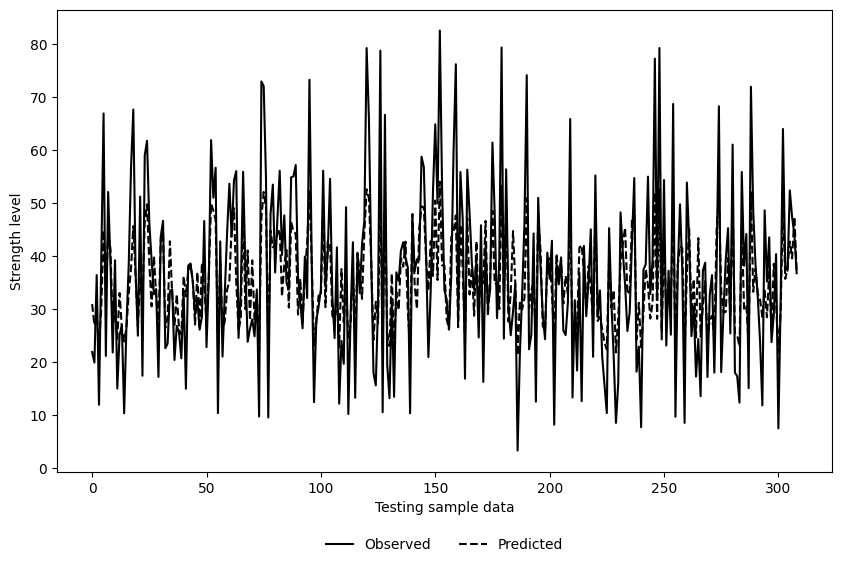

In [129]:
# Plotting the observed and predicted Strength level data
# Set the boundaries and other characteristics

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('Strength level')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show

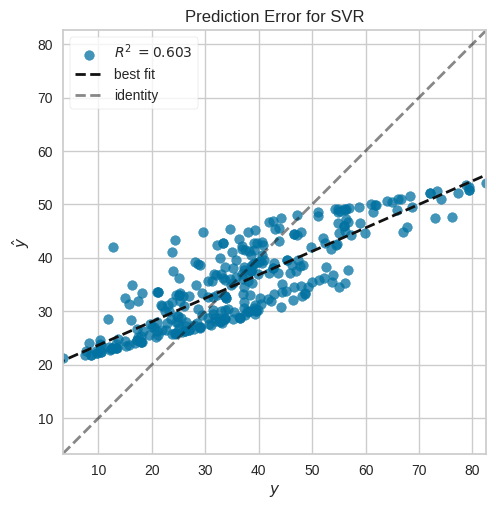

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [132]:
# Plotting the prediction errors and residuals
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Strength_svr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

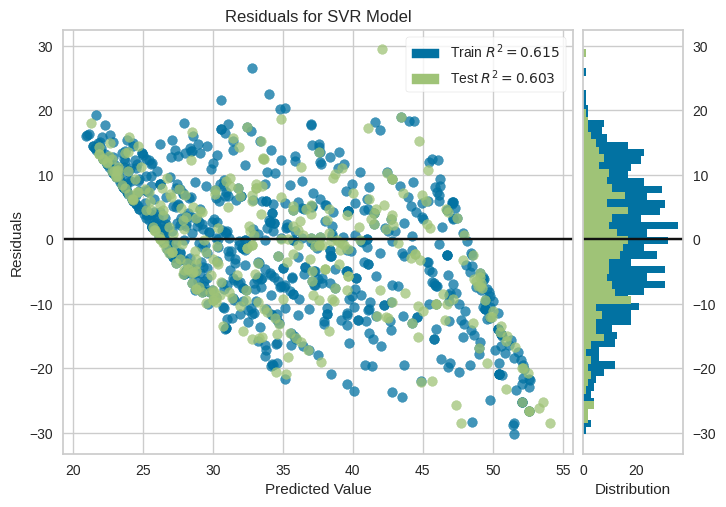

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [135]:
# The residuals plot 

from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Strength_svr)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof()


In [138]:
# Testing model evaluation
# MAE, MSE, RMSE, EVS
print('The MAE is %.5f'% mean_absolute_error(y_test, ytest_pred))
print('The MSE is %.5f'% mean_squared_error(y_test, ytest_pred))
print('The RMSE is %.5f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('The EVS is %.5f'% explained_variance_score(y_test, ytest_pred))


The MAE is 8.15342
The MSE is 104.09637
The RMSE is 10.20276
The EVS is 0.60796


In [140]:
# The k fold cross-validation
from sklearn.model_selection import cross_val_score

# On the training dataset
score_train = cross_val_score(Strength_svr, X_train, y_train, scoring = 'r2', cv = 10)

In [141]:
score_train

array([0.53943261, 0.54667421, 0.59717192, 0.56407309, 0.53956838,
       0.59227962, 0.5971993 , 0.5794664 , 0.5527722 , 0.60232983])

In [ ]:
# Mean score
print(np.mean(score_train))

In [143]:
# On the testing dataset
score_test = cross_val_score(Strength_svr, X_test, y_test, scoring = 'r2', cv = 10)

In [144]:
score_test

array([0.27045013, 0.37064072, 0.27257505, 0.39797452, 0.36124881,
       0.2127484 , 0.26898529, 0.34772545, 0.34346826, 0.39903697])

In [145]:
# Mean score
print(np.mean(score_test))

0.3244853595094727
